# <center>Лабораторная работа №3-4
## <center>Визуальный анализ данных о публикациях на Хабрахабре

In [30]:
# Подгружаем нужные библиотеки:

import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [31]:
df = pd.read_csv('howpop_train.csv')

In [32]:
df.shape

(134137, 17)

In [33]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [34]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [36]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [37]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [38]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [39]:
df['year'] = df.published.apply(lambda ts: ts.year)
df['month'] = df.published.apply(lambda ts: ts.month)
df['day'] = df.published.apply(lambda ts: ts.day)
df['dayofweek'] = df.published.apply(lambda ts: ts.isoweekday())
df['hour'] = df.published.apply(lambda ts: ts.hour)

-----
Далее следует ответить на вопросы, используя инструменты визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [40]:
# # print(df.published.dtype)
# df['published'] = pd.to_datetime(df.published, yearfirst = True)
# # print(df.published.dtype)
# df['year'] = df.published.apply(lambda ts: ts.year)
# df['month'] = df.published.apply(lambda ts: ts.month)
# count_2016_03 = ((df['year'] == 2016) & (df['month'] == 3)).value_counts()
# count_2015_03 = ((df['year'] == 2015) & (df['month'] == 3)).value_counts()
# print('March 2016: \n',count_2016_03,'\nMarch 2015: \n',count_2015_03)
# count_2016_04 = ((df['year'] == 2016) & (df['month'] == 4)).value_counts()
# count_2015_04 = ((df['year'] == 2015) & (df['month'] == 4)).value_counts()
# print('April 2016: \n',count_2016_04,'\nApril 2015: \n',count_2015_04)

df['month_year'] = [str(publ)[:7] for publ in df.published]
print(df.month_year.value_counts()[:10])
max_published = df.month_year.value_counts().index[0]
print(max_published)

# df.groupby(['year','month'])['title'].count().sort_values()


2015-03    2189
2016-03    2115
2015-07    2111
2015-04    2110
2015-12    2084
2015-11    2035
2015-10    2030
2015-06    2004
2015-09    1944
2016-04    1910
Name: month_year, dtype: int64
2015-03


## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

C:\Users\User\AppData\Local\Temp/ipykernel_13140/3262758905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_publmonth['day'] = [publ.day for publ in df_publmonth.published]


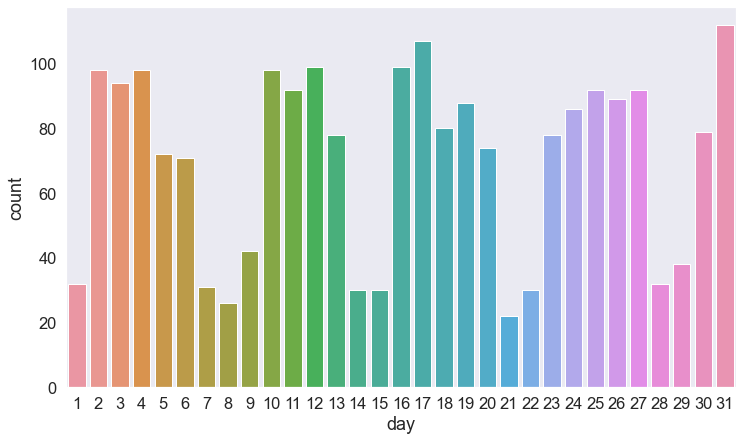

In [41]:
import matplotlib.pyplot as matplt
df_publmonth = df[df.month_year == max_published]
df_publmonth['day'] = [publ.day for publ in df_publmonth.published]
plt.figure(figsize=(12,7))
sns.countplot(x = 'day',data = df_publmonth);

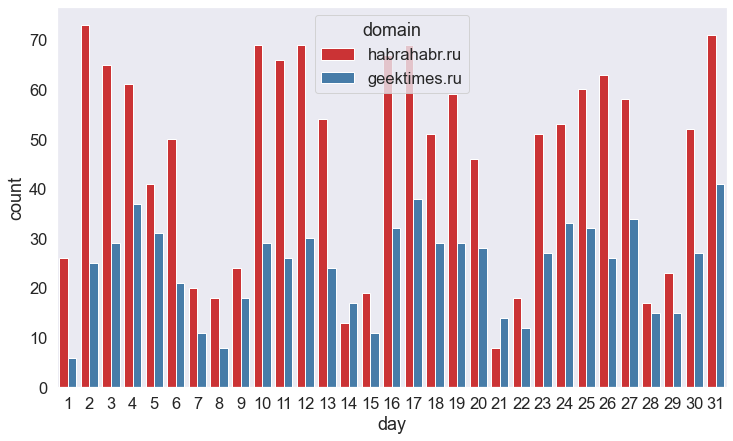

In [42]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'day', hue = 'domain',palette = 'Set1', data = df_publmonth);

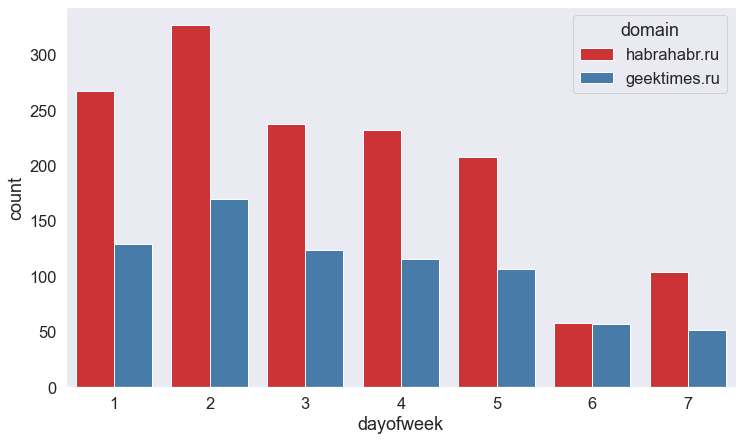

In [43]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'dayofweek', hue = 'domain',palette = 'Set1', data = df_publmonth);

## 3\. Когда лучше всего публиковать статью?

Проверте истинность утверждений:

* Больше всего просмотров набирают статьи, опубликованные в 14 часов дня.
* У опубликованных в 10 утра постов больше всего комментариев.
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра.
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера.
* На хабре дневные статьи комментируют чаще, чем вечерние

Подтвердите каждое утверждение **в отдельной строке с кодом**.

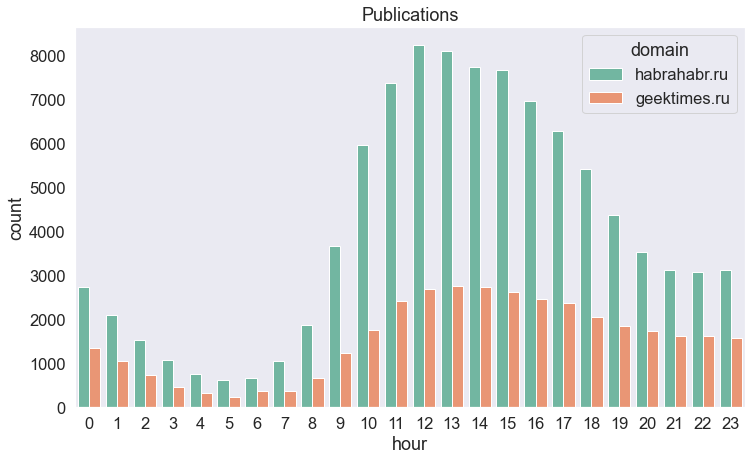

In [53]:
plt.figure(figsize=(12,7))
#views = df.groupby('hour')['views'].mean().sort_values(ascending=False)
publ_byhour = sns.countplot(x = 'hour', hue = 'domain', palette='Set2',data = df);
publ_byhour.set_title("Publications");

hour
6     21354.310115
4     20678.389091
7     19093.953408
3     18370.017972
22    18365.387460
Name: views, dtype: float64


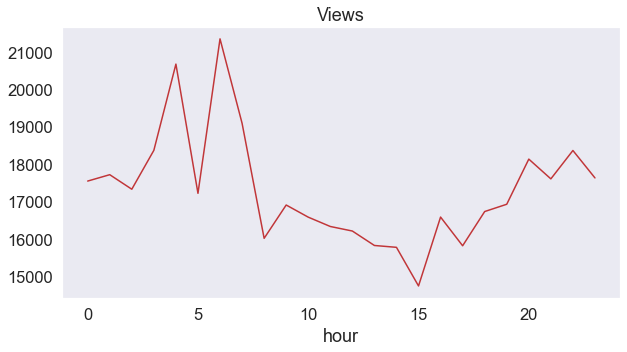

In [45]:
print(df.groupby('hour')['views'].mean().sort_values(ascending=False)[:5])
plt.figure(figsize=(10,5))
df.groupby('hour')['views'].mean().plot(title = 'Views');

hour
4    53.657273
3    53.123877
6    51.799618
1    49.417910
2    48.827025
Name: comments, dtype: float64


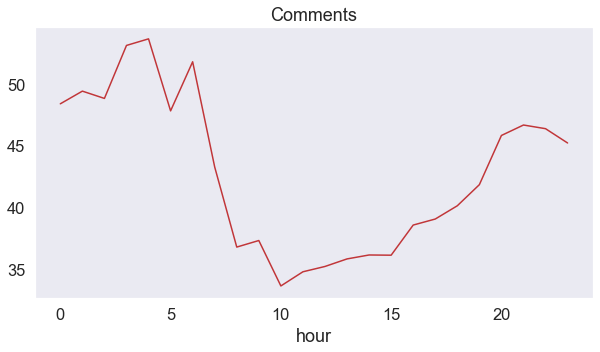

In [46]:
plt.figure(figsize=(10,5))
print(df.groupby('hour')['comments'].mean().sort_values(ascending=False)[:5])
df.groupby('hour')['comments'].mean().plot(title = 'Comments');

<AxesSubplot:xlabel='hour'>

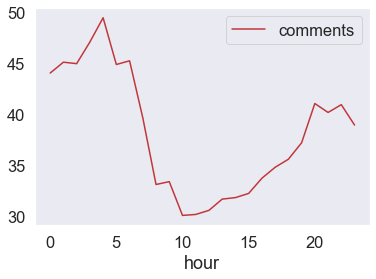

In [47]:

df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot()


## 4\. Кого из топ-10 авторов чаще всего минусуют, а кого плюсуют?

Изобразите на первом графике топ-10 авторов с наибольшим количеством минусов, а втором — с наибольшем количеством плюсов.


In [48]:
df.groupby(['author'])[['votes_minus']].mean().sort_values('votes_minus', ascending = False)[:10]

,votes_minus
author,
@InCode,177.0
@Andersot,161.0
@psfinaki,160.0
@tozhemne,154.0
@CaptainQuazar,150.0
@kshnurov,149.0
@LifeDJ,146.0
@smartseven,137.0
@ceba,130.0


In [49]:
df.groupby(['author'])[['votes_plus']].mean().sort_values('votes_plus', ascending = False)[:10]

,votes_plus
author,
@antonk18,600.0
@Kuliba,574.0
@Harkonnen,547.0
@artpetrov,538.0
@densss2,509.0
@yaPetrovich,474.0
@ernesttsenre,473.0
@Bloodrammer,418.0
@TheR,410.0


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером? Изобразите решение на графике.

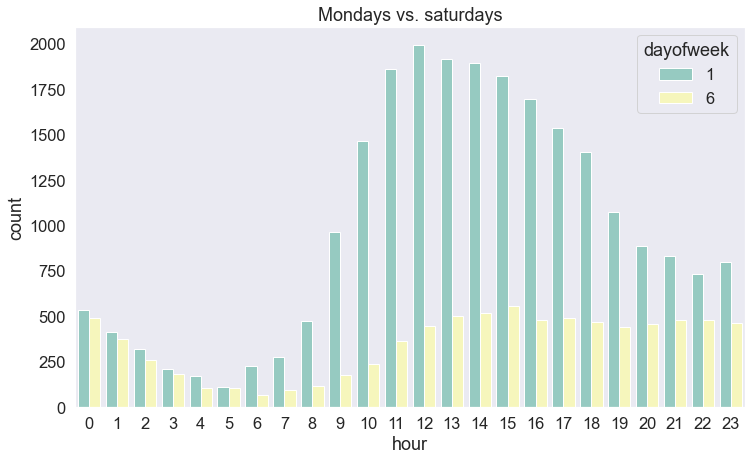

In [52]:
plt.figure(figsize=(12,7))
publ_byhour = sns.countplot(x = 'hour', hue = 'dayofweek', palette='Set3',data = df[df.dayofweek.isin([1, 6])]);
publ_byhour.set_title("Mondays vs. saturdays");
